# Mini-projet

# Calcul des forces de pression sur une digue

![Digue.png](./Digue.png)

## Constantes des calculs

Hauteur de la masse d'eau : $H = 10 m$

Masse volumique du béton : $\rho_{beton} = 3000  kg.m^{-3}$

Masse volumique de l'eau : $\rho_{eau} = 1000  kg.m^{-3}$

coefficient de friction statique béton - roche : $\mu = 0.5$

constante de gravitation terrestre : $g = 9.8 N.kg^{-1}$

a. Faites un bilan des forces appliquées à la digue en 2D. Quelle force permet à la digue de ne pas glisser sur le sol rocheux ?

### Bilan des forcces appliquées à la digue en 2D

Le Poid : $F{p} = \rho_{beton}*V*g$  avec m qui est la masse du barrage

La pression de l'eau : $P{eau} = \rho*g *(H-y)$  avec H la hauteur du barage et $\rho$ la masse volumique de l'eau

Frottement de Coulomb : $F{frottement} = \mu * \displaystyle \int_{0}^{H} \rho*g *(H-x)\, \mathrm{d}x$

Réaction du support : $F{support} = -F{p}$

### Equation d'équilibre statique de la digue

$\sum F u_{n} = 0$

On a donc : $F{p} + P{eau} + F{frottement} + F{support} = 0$

$\Longrightarrow$   $F{p} + P{eau} + F{frottement} - F{p} = 0$

$\Longrightarrow$  $P{eau} = -F{frottement}$

## Démarche Modélisation

Pour modéliser la digue on crée une fonction qui représente les pentes du coté air et du coté eau. Pour faciliter l'intégration des fonction il est plus pratique de définir les pentes de la digue comme étant $x$ en fonction de $y$ 

![DigueSchema.png](./DigueSchema.png)

On a donc deux fonction. La fonction croissante $F_{air}(y)$ représente la pente air-béton. Elle a pour minimum $x_{a}$ et comme maximum $0$.

La fonction décroissante $F_{eau}(y)$ représentant la pente eau-béton. Elle a pour minimum $0$ et comme maximum $x_{e}$.

L'expression de la courbe air-béton est donné ppar la fonction : 

$$
f_{air}(y) = -\frac{x_a}{H}.(y-H)
$$

### Reprsésentation de la courbe côté eau

On importe les librairies nécessaires au code

In [38]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as si

on fait un code pour afficher les courbes représentant la digue renversé, où y est la variable 

In [39]:
#définition des constantes
H = 10
xa = -5
xe = +5
g = 9.8
rho_b = 3000
rho_eau = 1000
mu = 0.5
L=1

In [40]:
# On définit les fonctions côté eau et côté air, ici les courbes concaves
def fair(y,xa):
    return -(y - H) * xa / H

def feau(y,xe):
    return -(y - H) * xe / H

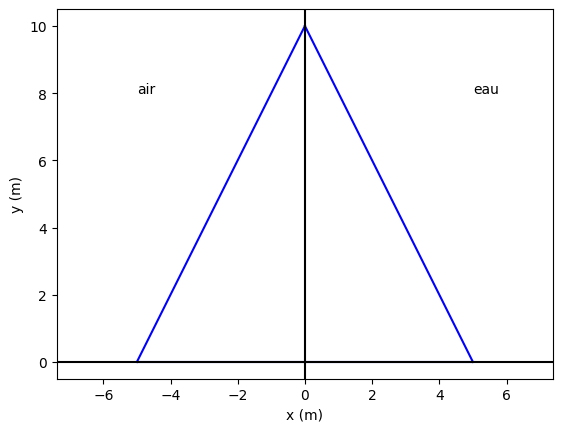

In [41]:
# On crée un tableau de y
y = np.linspace(0, H, 1000)

# On trace
plt.plot(fair(y,xe), y, '-b') 
plt.plot(feau(y,xa), y, '-b')
 
plt.plot([xe, xa], [0, 0], '-b') # Bas de la digue
plt.xlabel('x (m)') 
plt.ylabel('y (m)')
plt.text(xe, 8, 'eau')
plt.text(xa, 8, 'air')
plt.axis('equal') # Permet d'avoir un plot isométrique
plt.axhline(0, color = "black")
plt.axvline(0, color = "black")
plt.xlim(-8, 8)
plt.show()

## Expression de la force de pression

La Force de pression de l'eau est l'intégrale de la pression de $0$ à $H$ : 
$$
\vec{F} = \iint_S \vec{\mathrm{d}F} 
$$

Notre problème est simplifier à deux dimension on a donc $dS = L dl$. Or L est la longueur unitairede la digue suivant z. Dobnc cela ce simplifie à une intégrale a 1D on a donc :

$$
\vec{F} = \iint_S \vec{\mathrm{d}F} =\int_0^H P_{eau}(y) \mathrm{d}l . \vec{n}
$$

On cherche maintenant l'expression de $\vec{n}$

L'angle $\theta$ est l'angle entre la tagente et un point de l'axe des abscisses. Il est relié par la dérivée de la courbe par : $tan(\theta) = f'(y)$

on a donc : 
$$
\vec t = \cos(\theta).\vec{u_y} + \sin(\theta).\vec{u_x}
$$

$$
\vec n = \sin(\theta).\vec{u_y} - \cos(\theta).\vec{u_x} 
$$


avec $\vec{n}$ le vecteur normal rentrant au point de coordonnées $(f(y),y)$, et $\mathrm{d}l$ la longueur infinitésimale de la courbe pour une variation $\mathrm{d}x$. On montre facilement la relation avec l'angle $\theta$ défini avant :

$$
\mathrm{d}l = \frac{\mathrm{d}y}{\cos(\theta)}
$$

On a : 

$$
\vec{F} =\int_0^H (\rho*g *(H-y)) (\frac{\mathrm{d}y}{\cos(\theta)}) . (\sin(\theta).\vec{u_y} - \cos(\theta).\vec{u_x})
$$

![DigueAngles.png](./DigueAngles.png)

#### Calcul du volume de la digue

On calcul l'intégrale de la fonction de la pente que l'on multiple par 2 pour obtenir le volume de la digue

In [42]:
# Bornes d'intégration
y_0 = 0
y_max = H

In [43]:
def largeur_tri(y):
    return (feau(y,xe)-fair(y,xa))*L

Volume=si.quad(largeur_tri,y_0,y_max)

In [44]:
# Calcul du résultat analytique du triangle
V_ana = (xe-xa)/2*L*H

In [45]:
print('Volume approximation \t', Volume)
print('Volume analytique \t', V_ana)

Volume approximation 	 (50.0, 5.551115123125783e-13)
Volume analytique 	 50.0


Entre le volume analytique et le volume approximatique il y a une erreur d'environ $5.55*10^{-13} m^{3}$

#### Calcul de la force de gravité exercé sur la digue 

In [46]:
F_p = rho_b * V_ana * g

print('Force de gravité exercé sur la digue \t', F_p)

Force de gravité exercé sur la digue 	 1470000.0


#### Calcul de la force de pression sur la digue

On établie les fonctions que l'on intégre ensuite pour obtenir le composant tangancielle et nomale de la force de pression

In [47]:
#dérivé de la pente eau-béton
dfeau = -(xe/H)

#définition de la fonction de la pression de l'eau
def P_eau(y):
    return g*rho_eau*(H-y)

#on crée uen fonction qui donne la composante y, tan=f'(y)
def f(y):
    return P_eau(y)*dfeau

Lorsque j'intègre j'enlève l'erreur pour ne pas obtenir un tuple car je dois ajouter le poids à la composante normale

In [48]:
resultante_x,erreur = si.quad(P_eau,y_0,y_max)
resultante_y,erreur = si.quad(f,y_0,y_max)
resultante_y += F_p

In [49]:
print('Tangentielle de la force de pression coté eau \t', resultante_x)
print('Normale de la force de pression coté eau \t', resultante_y)

Tangentielle de la force de pression coté eau 	 490000.0
Normale de la force de pression coté eau 	 1225000.0


In [50]:
print('coefficient de frottement \t', resultante_x/resultante_y)

coefficient de frottement 	 0.4


On trouve que $\frac{resultante_{x}}{resultante_{y}} < \mu$   la digue est donc bien à l'équilibre statique

On crée une fonction génerale qui réalise toutes les étapes pour calculer le coefficient de frottement.

In [51]:
def f_generale(y,xe,xa):
    
    V,erreur = si.quad(largeur_tri,0,H)
    
    resultante_x,erreur = si.quad(P_eau,0,H)
    resultante_y,erreur = si.quad(f,0,H)
    resultante_y += rho_b * V * g
    
    print('Tangentielle de la force de pression coté eau \t', resultante_x)
    print('Normale de la force de pression coté eau \t', resultante_y)
    print('coefficient de frottement \t', resultante_x/resultante_y)
    
    
    plt.plot(fair(y,xa), y, '-b')
    plt.plot(feau(y,xe), y, '-b')
 
    plt.plot([xe, xa], [0, 0], '-b') # Bas de la digue
    plt.xlabel('x (m)') 
    plt.ylabel('y (m)')
    plt.text(xe, 8, 'eau')
    plt.text(xa, 8, 'air')
    plt.axis('equal') # Permet d'avoir un plot isométrique
    plt.axhline(0, color = "black")
    plt.axvline(0, color = "black")
    plt.xlim(-8, 8)
    plt.show()
    
    

Tangentielle de la force de pression coté eau 	 490000.0
Normale de la force de pression coté eau 	 1225000.0
coefficient de frottement 	 0.4


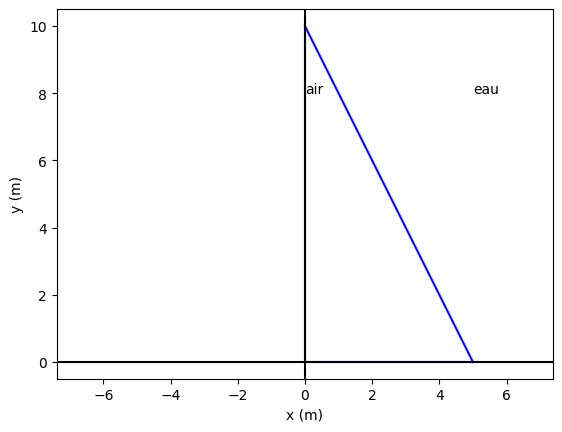

In [52]:
f_generale(y,xe,0)

Tangentielle de la force de pression coté eau 	 490000.0
Normale de la force de pression coté eau 	 1225000.0
coefficient de frottement 	 0.4


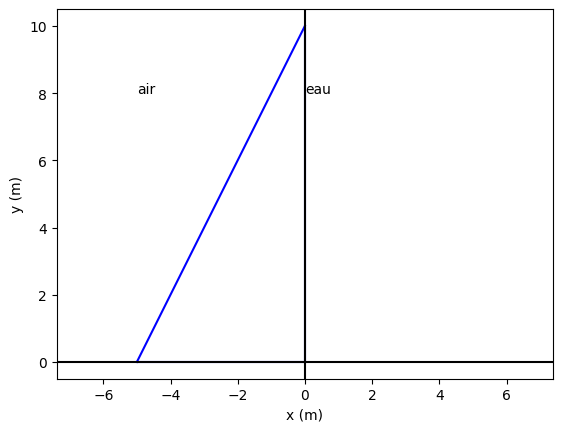

In [53]:
f_generale(y,0,xa)

### Cas des digues convexes

On considère maintenant que l'interface entre l'eau et le béton n'est plus une fonction affine mais une fonction de la forme :

$$
f_{eau} (y)=a \left(\frac{y}{H}\right)^2-(a+x_e)\left(\frac{y}{H}\right) +x_e
$$


on donne également la dérivée :

$$
f'_{eau} (y)=\frac{2ay}{H^2}-\frac{a+x_e}{H}
$$

(on peut vérifier aisément que cette fonction relie bien les points de coordonées $[x_e,0]$ et $[0,H]$). Dans la suite nous prendrons $a=3$.

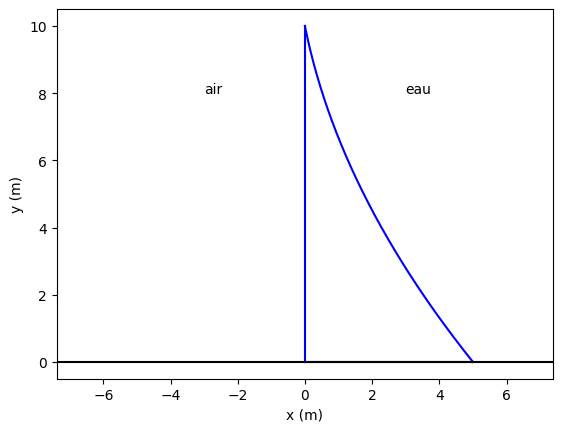

In [56]:
# Ce code permet d'afficher les courbes représentant la digue

H = 10
xe = 5
xa = 0

# On définit les fonctions côté eau et côté air, ici les courbes concaves
a = 3
def feau(y):
    return a * (y / H) ** 2 - (a + xe) * (y / H) + xe
def fair_2(y):
    return (H - y) * xa / H

# On crée un tableau de y
y = np.linspace(0, H, 1000)

# On trace
plt.plot(feau(y), y, '-b')
plt.plot(fair(y,xa), y, '-b')
plt.plot([xe, xa], [0, 0], '-b')
plt.xlabel('x (m)')
plt.ylabel('y (m)')
plt.text(3, 8, 'eau')
plt.text(-3, 8, 'air')
plt.axis('equal') # Permet d'avoir un plot isométrique
plt.axhline(0, color = "black")
#plt.axvline(0, color = "black")
plt.xlim(-8, 8)
plt.show()

In [58]:
a=3

In [59]:
def fair_2(y):
    return (H - y) * xa / H

In [60]:
def feau_2 (y):
    return a*(y/H)**2 - (a+xe)*(y/H) + xe

In [61]:
dfeau_2 = (2*a*y)/(H**2) - (a+xe)/H

In [64]:
def largeur_tri_2(y):
    return (feau_2(y)-fair_2(y))*L

Volume=si.quad(largeur_tri_2,y_0,y_max)

In [65]:
def f2(y):
    return P_eau(y)*((2*a*y)/(H**2) - (a+xe)/H)

In [68]:
def f_generale2(y,xe,xa):
     
    V2,erreur=si.quad(largeur_tri_2,0,H)
        
    resultante_x,erreur = si.quad(P_eau,0,H)
    resultante_y,erreur = si.quad(f2,0,H)
    resultante_y += rho_b * V2 * g
    
    print('Tangentielle de la force de pression coté eau \t', resultante_x)
    print('Normale de la force de pression coté eau \t', resultante_y)
    print('coefficient de frottement \t', resultante_x/resultante_y)
     
    plt.plot(feau(y), y, '-b')
    plt.plot(fair(y,xa), y, '-b')
    plt.plot([xe, xa], [0, 0], '-b')
    plt.xlabel('x (m)')
    plt.ylabel('y (m)')
    plt.text(3, 8, 'eau')
    plt.text(-3, 8, 'air')
    plt.axis('equal') # Permet d'avoir un plot isométrique
    plt.axhline(0, color = "black")
    #plt.axvline(0, color = "black")
    plt.xlim(-8, 8)
    plt.show()

Tangentielle de la force de pression coté eau 	 490000.0
Normale de la force de pression coté eau 	 294000.0
coefficient de frottement 	 1.6666666666666667


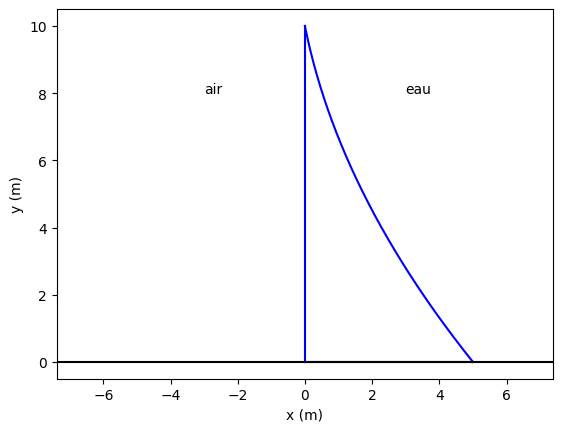

In [69]:
f_generale2(y,xe,0)  #erreur que je n'arrive pas a trouvé

On trouve que $\frac{resultante_{x}}{resultante_{y}} > \mu$   la digue n'est donc pas à l'équilibre statique

Tangentielle de la force de pression coté eau 	 490000.0
Normale de la force de pression coté eau 	 294000.0
coefficient de frottement 	 1.6666666666666667


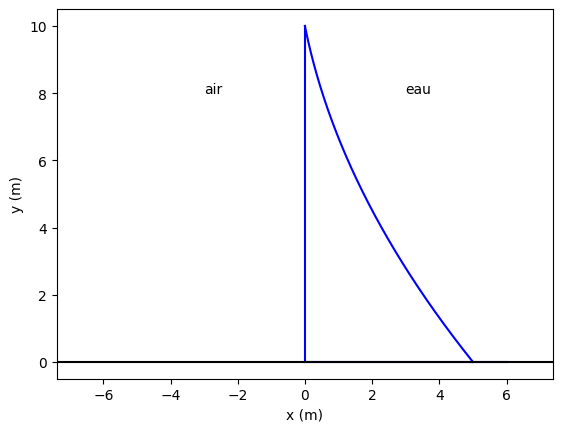

In [70]:
f_generale2(y,6,0)   #erreur que je n'arrive pas a trouvé 

g. Utilisez une boucle pour calculer le volume et le rapport $T/N$ en faisant varier $x_e$ dans l'intervalle $[5,6]$. On pourra ainsi tracer le rapport $T/N$ en fonction du volume. Déterminez graphiquement le volume minimal pour garder le rapport $T/N$ inférieur à 0.5 dans le cas courbe.

In [71]:
# Fonction qui calcule le volume et le rapport T/N
def f_V_T_N(xe):
    
    def feau_2 (y):
        return a*(y/H)**2 - (a+xe)*(y/H) + xe
    
    V,erreur=si.quad(feau_2,0,H)
    
    F_p = rho_b * V * g
    
    def P_eau(y):
        return g*rho_eau*(H-y)
    
    
    def f2(y):
        return P_eau(y)*((2*a*y)/(H**2) - (a+xe)/H)

    resultante_x,erreur = si.quad(P_eau,0,H)
    resultante_y,erreur = si.quad(f2,0,H)
    resultante_y += F_p
    
    print('coefficient de frottement \t', resultante_x/resultante_y)

    # Calcul du rapport entre les résultantes
    r =  resultante_x/resultante_y

    return V, r

coefficient de frottement 	 1.6666666666666667
coefficient de frottement 	 1.6661107404936626
coefficient de frottement 	 1.6655551850616863
coefficient de frottement 	 1.6649999999999991
coefficient de frottement 	 1.6644451849383541
coefficient de frottement 	 1.6638907395069953
coefficient de frottement 	 1.6633366633366637
coefficient de frottement 	 1.6627829560585892
coefficient de frottement 	 1.6622296173044935
coefficient de frottement 	 1.6616766467065864
coefficient de frottement 	 1.6611240438975725
coefficient de frottement 	 1.6605718085106385
coefficient de frottement 	 1.6600199401794598
coefficient de frottement 	 1.6594684385382046
coefficient de frottement 	 1.6589173032215203
coefficient de frottement 	 1.6583665338645421
coefficient de frottement 	 1.6578161301028875
coefficient de frottement 	 1.6572660915726611
coefficient de frottement 	 1.6567164179104479
coefficient de frottement 	 1.6561671087533156
coefficient de frottement 	 1.6556181637388132
coefficient d

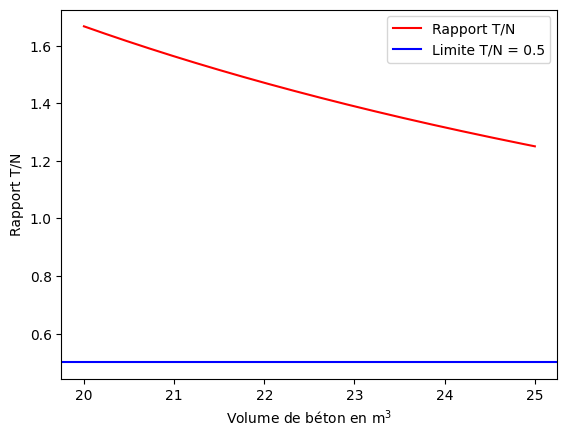

In [72]:
# mise en place de la boucle
liste_xe = np.linspace(5, 6, 1000)
volumes = []
rapports = []

for xe in liste_xe:
    V, rapport = f_V_T_N(xe)
    volumes.append(V)
    rapports.append(rapport)

# Tracer le rapport T/N en fonction du volume
plt.plot(volumes, rapports, label='Rapport T/N',color='red')
plt.axhline(0.5, color='blue', linestyle='-', label='Limite T/N = 0.5')
plt.xlabel('Volume de béton en m$^{3}$')
plt.ylabel('Rapport T/N')
plt.legend()
plt.show()

h. Expliquez pourquoi la forme courbe de l'interface aide à réduire le volume de béton nécessaire à garder la digue en équilibre.

## Parenthèse

Nous avons ici omis la deuxième équation d'équilibre statique : le théorème du moment cinétique (ou équilibre du moment des forces dans le cas statique).

Pour vérifier que la digue ne bascule pas sous la pression de l'eau, il faudrait en effet vérifier que le moment des forces qui s'applique à la digue soit nul.

Pour cela, il faudrait :

- trouver le point d'application du poids (le centre de gravité de la digue),
- calculer le moment du poids par rapport à un point,
- calculer la résultante du moment des forces de pression par rapport au même point,
- trouver le point d'application de la réaction du sol qui annule la somme des moments des forces (par rapport à un point quelconque) 
- vérifier que ce point d'application est bien situé quelque part entre la digue et le sol (sinon la digue bascule...)


